# Competition Background
- StumbleUpon is a user-curated web content discovery engine that recommends relevant, high quality pages and media to its users, based on their interests. While some pages we recommend, such as news articles or seasonal recipes, are only relevant for a short period of time, others maintain a timeless quality and can be recommended to users long after they are discovered. 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [ ]:
df = pd.read_csv('drive//MyDrive/Stumble Upon Evergreeb Classification/train.tsv', sep = '\t')

In [ ]:
df.sample(5)

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
3420,http://www.ivillage.com/slow-cooker-recipes-st...,8668,"{""title"":""Slow Cooker Recipes iVillage "",""body...",?,?,2.417553,0.793194,0.397906,0.107330,0.047120,0.854962,0.0,0,0.031128,0,0.183833,0.739130,?,1,76,?,1485,382,6,0.120419,0.060606,1
4100,http://au.news.yahoo.com/a/-/world/5325538/cru...,8246,"{""title"":""Cruel Facebook hoax ends marriage "",...",culture_politics,0.718757,2.692771,0.614525,0.189944,0.055866,0.033520,0.493995,0.0,0,0.043758,0,0.259374,0.103448,?,1,55,0,1805,179,7,0.206704,0.060606,0
569,http://www.cinnamonspiceandeverythingnice.com/...,962,"{""title"":""Tomato Cheddar Pie "",""body"":""One of ...",?,?,1.436364,0.416667,0.150000,0.033333,0.016667,0.417370,0.0,0,0.108000,0,0.260717,0.028274,?,0,9,?,4090,60,5,0.150000,0.054432,1
6329,http://firstlookthencook.wordpress.com/2010/05...,7521,"{""title"":""Marshmallow Brownies First Look Then...",?,?,2.000000,0.610526,0.300000,0.152632,0.142105,0.482609,0.0,0,0.026699,0,0.243570,0.142077,?,1,19,?,6009,190,2,0.242105,0.080925,1
6803,http://nymag.com/daily/fashion/2011/11/see-lor...,5702,"{""title"":""Lord Taylor s Holiday Window Display...",business,0.411187,2.569892,0.372881,0.084746,0.016949,0.000000,0.538954,0.0,0,0.103203,0,0.246743,0.059524,1,1,47,0,1307,118,8,0.228814,0.112245,0


In [ ]:
df.label.mean()

0.5133198106828939

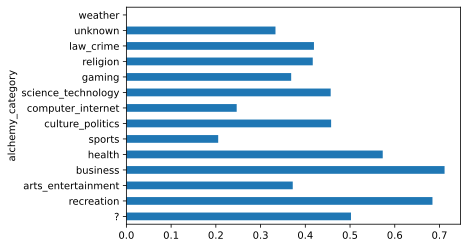

In [ ]:
df.groupby('alchemy_category').label.agg(['mean', 'count']).sort_values('count', ascending = False)['mean'].plot.barh()

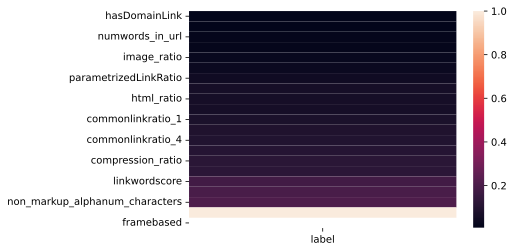

In [ ]:
import seaborn as sns
sns.heatmap(df.corr('spearman').abs()[['label']].sort_values('label'))

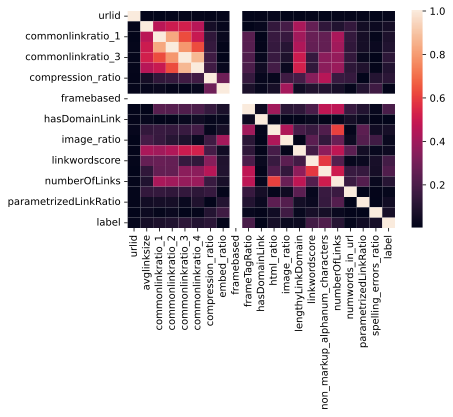

In [ ]:
sns.heatmap(df.corr('spearman').abs())

In [ ]:
del df['framebased']
del df['urlid']
del df['alchemy_category_score']

In [ ]:
df['is_news'] = df['is_news'].str.replace('?', '0').astype(int)

In [ ]:
df.columns

Index(['url', 'boilerplate', 'alchemy_category', 'avglinksize',
       'commonlinkratio_1', 'commonlinkratio_2', 'commonlinkratio_3',
       'commonlinkratio_4', 'compression_ratio', 'embed_ratio',
       'frameTagRatio', 'hasDomainLink', 'html_ratio', 'image_ratio',
       'is_news', 'lengthyLinkDomain', 'linkwordscore', 'news_front_page',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio', 'label'],
      dtype='object')

In [ ]:
features_df = df.drop('label' , axis = 1)
num_features = features_df.select_dtypes(np.number)
num_features.sample(5)

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
5897,1.046875,0.184211,0.039474,0.000000,0.000000,0.521438,0.0,0.168950,0,0.224373,0.304348,1,0,23,1159,76,5,0.355263,0.128788
5259,1.040541,0.175824,0.054945,0.000000,0.000000,0.495565,0.0,0.152263,0,0.224610,0.250000,1,0,20,1562,91,6,0.296703,0.084848
383,1.750000,0.708861,0.274262,0.084388,0.016878,0.003554,-1.0,0.014659,1,0.204944,-1.000000,1,0,6,29274,237,8,0.734177,0.045455
796,1.671756,0.328244,0.259542,0.038168,0.030534,0.367338,0.0,0.064356,0,0.218206,0.138418,1,1,30,2673,131,7,0.053435,0.076712
2280,4.730159,0.700935,0.467290,0.233645,0.112150,0.376776,0.0,0.062837,0,0.276505,0.080882,0,1,49,1716,107,7,0.289720,0.116608


In [ ]:
num_features.describe()

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
count,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000
mean,2.761823,0.468230,0.214080,0.092062,0.049262,2.255103,-0.103750,0.056423,0.021231,0.233778,0.275709,0.615551,0.660311,30.077079,5716.598242,178.754564,4.960649,0.172864,0.101221
std,8.619793,0.203133,0.146743,0.095978,0.072629,5.704313,0.306545,0.041446,0.144162,0.052487,1.919320,0.486498,0.473636,20.393101,8875.432430,179.466198,3.233111,0.183286,0.079231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.045564,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.602062,0.340370,0.105263,0.022222,0.000000,0.442616,0.000000,0.028502,0.000000,0.201061,0.025900,0.000000,0.000000,14.000000,1579.000000,82.000000,3.000000,0.040984,0.068739
50%,2.088235,0.481481,0.202454,0.068627,0.022222,0.483680,0.000000,0.045775,0.000000,0.230564,0.083051,1.000000,1.000000,25.000000,3500.000000,139.000000,5.000000,0.113402,0.089312
75%,2.627451,0.616604,0.300000,0.133333,0.065065,0.578227,0.000000,0.073459,0.000000,0.260770,0.236700,1.000000,1.000000,43.000000,6377.000000,222.000000,7.000000,0.241299,0.112376
max,363.000000,1.000000,1.000000,0.980392,0.980392,21.000000,0.250000,0.444444,1.000000,0.716883,113.333333,1.000000,1.000000,100.000000,207952.000000,4997.000000,22.000000,1.000000,1.000000


In [ ]:
cat_features = df.select_dtypes(include = [np.object])
cat_features.head(5)

,url,boilerplate,alchemy_category,news_front_page
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0
1,http://www.popsci.com/technology/article/2012-...,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0
2,http://www.menshealth.com/health/flu-fighting-...,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0
3,http://www.dumblittleman.com/2007/12/10-foolpr...,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0
4,http://bleacherreport.com/articles/1205138-the...,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0


In [ ]:
cat_features = df.select_dtypes(include = [np.object])
cat_features = cat_features[['alchemy_category', 'news_front_page']]
cat_features.sample(5 , random_state = 0)

,alchemy_category,news_front_page
4646,?,?
3110,health,0
467,?,?
526,sports,0
2194,sports,0


In [ ]:
pd.get_dummies(cat_features).head(4)

,alchemy_category_?,alchemy_category_arts_entertainment,alchemy_category_business,alchemy_category_computer_internet,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather,news_front_page_0,news_front_page_1,news_front_page_?
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


## Modeling 


In [ ]:
pd.get_dummies(cat_features ).head(3)

,alchemy_category_?,alchemy_category_arts_entertainment,alchemy_category_business,alchemy_category_computer_internet,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather,news_front_page_0,news_front_page_1,news_front_page_?
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
features_df = pd.concat([num_features, pd.get_dummies(cat_features)], axis = 1)
features_df.shape

(7395, 36)

In [ ]:
target = df['label']
target.shape

(7395,)

In [ ]:
features_df = (features_df - features_df.mean())/features_df.std()

In [ ]:
features_df.head()

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,alchemy_category_?,alchemy_category_arts_entertainment,alchemy_category_business,alchemy_category_computer_internet,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather,news_front_page_0,news_front_page_1,news_front_page_?
0,-0.081936,1.025140,-0.055864,-0.468893,-0.354305,-0.317535,0.338451,0.828822,-0.147269,0.229640,-0.141626,0.790238,0.717195,-0.297997,-0.032967,-0.048781,0.940070,-0.108698,-0.278821,-0.680753,-0.381813,2.720737,-0.204182,-0.220527,-0.101895,-0.270999,-0.064878,-0.446421,-0.09915,-0.201654,-0.232728,-0.028494,-0.023262,0.513244,-0.203463,-0.450553
1,0.106284,0.195886,0.508987,1.269469,1.309714,-0.313176,0.338451,1.020244,-0.147269,-0.577072,-0.097460,0.790238,0.717195,0.486582,-0.083782,0.045944,1.249370,0.048853,0.305780,-0.680753,-0.381813,-0.367498,-0.204182,-0.220527,-0.101895,-0.270999,-0.064878,2.239734,-0.09915,-0.201654,-0.232728,-0.028494,-0.023262,0.513244,-0.203463,-0.450553
2,-0.043962,0.461692,0.733430,0.292698,-0.091238,-0.303219,0.338451,0.386654,-0.147269,-0.140539,-0.080848,0.790238,0.717195,1.222125,-0.391710,0.441562,1.867969,-0.033813,-0.550387,-0.680753,-0.381813,-0.367498,-0.204182,-0.220527,-0.101895,3.689551,-0.064878,-0.446421,-0.09915,-0.201654,-0.232728,-0.028494,-0.023262,0.513244,-0.203463,-0.450553
3,-0.141386,-0.335890,-0.777414,-0.785550,-0.678274,-0.311059,0.338451,0.951555,-0.147269,0.607347,-0.125235,0.790238,-1.394133,-0.297997,-0.335713,-0.327385,0.012171,-0.715808,-0.004574,-0.680753,-0.381813,-0.367498,-0.204182,-0.220527,-0.101895,3.689551,-0.064878,-0.446421,-0.09915,-0.201654,-0.232728,-0.028494,-0.023262,0.513244,-0.203463,-0.450553
4,-0.009902,0.156397,0.055487,0.327100,-0.083332,-0.317121,0.338451,-0.760377,-0.147269,-0.093184,-0.117352,0.790238,0.717195,-0.788359,0.711560,-0.093358,1.558669,-0.404279,-0.235413,-0.680753,-0.381813,-0.367498,-0.204182,-0.220527,-0.101895,-0.270999,-0.064878,-0.446421,-0.09915,-0.201654,4.296281,-0.028494,-0.023262,0.513244,-0.203463,-0.450553


In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(features_df, target  , test_size = 0.25)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
baseline = DummyClassifier(strategy='most_frequent')
baseline.fit(x_train, y_train)
baseline_predictions = baseline.predict(x_test)
print(classification_report(y_test , baseline_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       902
           1       0.51      1.00      0.68       947

    accuracy                           0.51      1849
   macro avg       0.26      0.50      0.34      1849
weighted avg       0.26      0.51      0.35      1849



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
model = LogisticRegressionCV()
model.fit(x_train , y_train)
model_predictions = model.predict(x_test)
print(classification_report(y_test , model_predictions))


              precision    recall  f1-score   support

           0       0.66      0.60      0.62       902
           1       0.65      0.70      0.67       947

    accuracy                           0.65      1849
   macro avg       0.65      0.65      0.65      1849
weighted avg       0.65      0.65      0.65      1849



In [ ]:
from  sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
model1 = RandomForestClassifier()
model1.fit(x_train , y_train)
model1_predictions = model1.predict(x_test)
print(classification_report(y_test , model1_predictions))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70       902
           1       0.71      0.70      0.71       947

    accuracy                           0.70      1849
   macro avg       0.70      0.70      0.70      1849
weighted avg       0.70      0.70      0.70      1849



In [ ]:
# More robust way to do feature pre-processing.
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

features_df = df.drop('label', axis=1)
FEATURE_COLUMNS = features_df.columns
NUM_FEATURES = features_df.select_dtypes(include=[np.number]).columns
CAT_FEATURES = ['alchemy_category', 'news_front_page']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)),
    ('scaler', StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('one_hot', OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer(
  transformers=[
      ('num', numeric_transformer, NUM_FEATURES),
      ('cat', categorical_transformer, CAT_FEATURES)
  ])

In [ ]:
features_df = preprocessor.fit_transform(df.drop('label', axis = 1))
features_df.shape


(7395, 36)

## Submission 

In [ ]:
test_df = pd.read_csv('drive//MyDrive/Stumble Upon Evergreeb Classification/test.tsv' , sep = '\t')
test_df['is_news'] = test_df['is_news'].str.replace('?','0').astype(int)

In [ ]:
sub_model = RandomForestClassifier()
sub_model.fit(features_df, target)
test_features = preprocessor.transform(test_df[df.drop('label' , axis = 1).columns])
predictions = sub_model.predict(test_features)

In [ ]:
sub_df = pd.DataFrame({'urlid' : test_df.urlid , 'label'  : predictions})
sub_df.head()

,urlid,label
0,5865,1
1,782,0
2,6962,0
3,7640,0
4,3589,0


In [ ]:
sub_df.to_csv('submission.csv', index = False)